Задание
Цель: изучить применение дерева решений в рамках задачи регрессии
Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets.
Скачать датасет также можно по ссылке
Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.  
Этапы работы:  
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.  
a.Проверьте данные на пропуски. Удалите в случае обнаружения.  
b.*Нормализуйте один из признаков.  
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.  
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.  
6. Обучите дерево решений на обучающем множестве.  
a. Повторите п. 5 для полученной модели.  
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.  
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.  
a. Повторите п. 5 для полученной модели.  
8. Сформулируйте выводы по проделанной работе.  
a. Сравните точность двух моделей.  
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?
Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/ch.csv')
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


1 Этап.  
Выполним предварительный прогноз с проверкой на пропуски и нормализацией признаков. Также, на всякий случай, сделаю матрицу корреляций чтобы увидеть зависимости между признаками.  
К сожалению не удалось запустить print(fetch_california_housing().DESCR)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


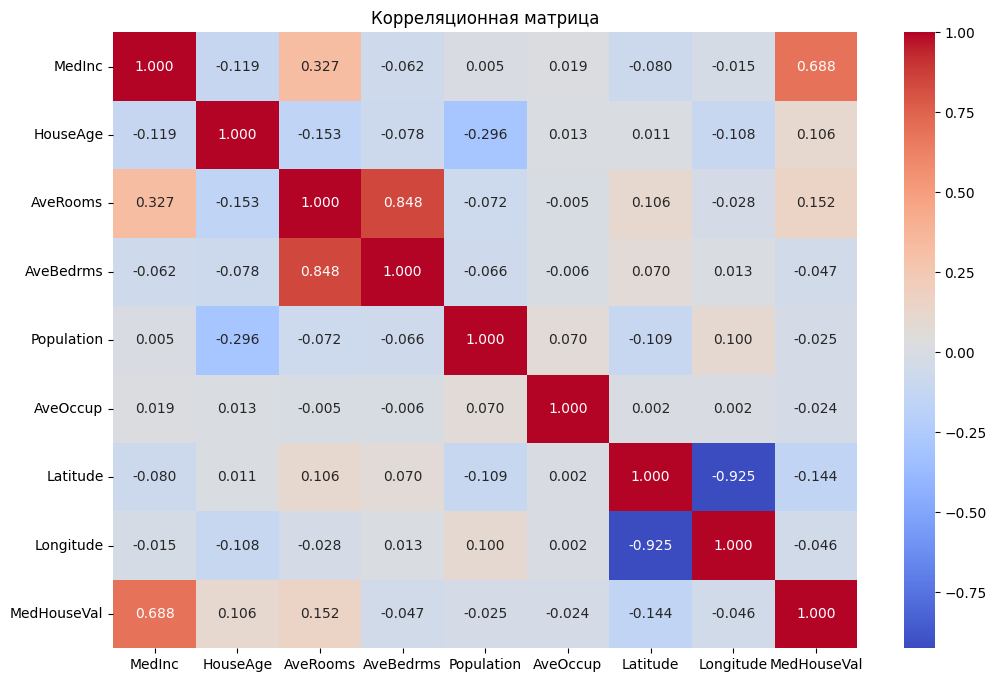

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df[['Population']] = scaler.fit_transform(df[['Population']])

x = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


model = LinearRegression()

model.fit(x_train, y_train)

print(f'точность на обучении:{model.score(x_train, y_train)}')
print(f'точность на тесте:{model.score(x_test, y_test)}')

точность на обучении:0.6125511913966952
точность на тесте:0.575787706032451


2 Этап.  
Подгружаем дерево решений, обучим и посмотрим точность. Также посмотрим на него визуально и сделаем график прогнозов.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

x2 = df.drop(columns='MedHouseVal')
y2 = df['MedHouseVal']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=42, test_size=0.2)

clf = DecisionTreeRegressor(max_depth=6, random_state=10)

clf.fit(x2_train, y2_train)

print(f'точность на обучении:{clf.score(x2_train, y2_train)}')
print(f'точность на тесте:{clf.score(x2_test, y2_test)}')


точность на обучении:0.6782454652473255
точность на тесте:0.6205125146233951


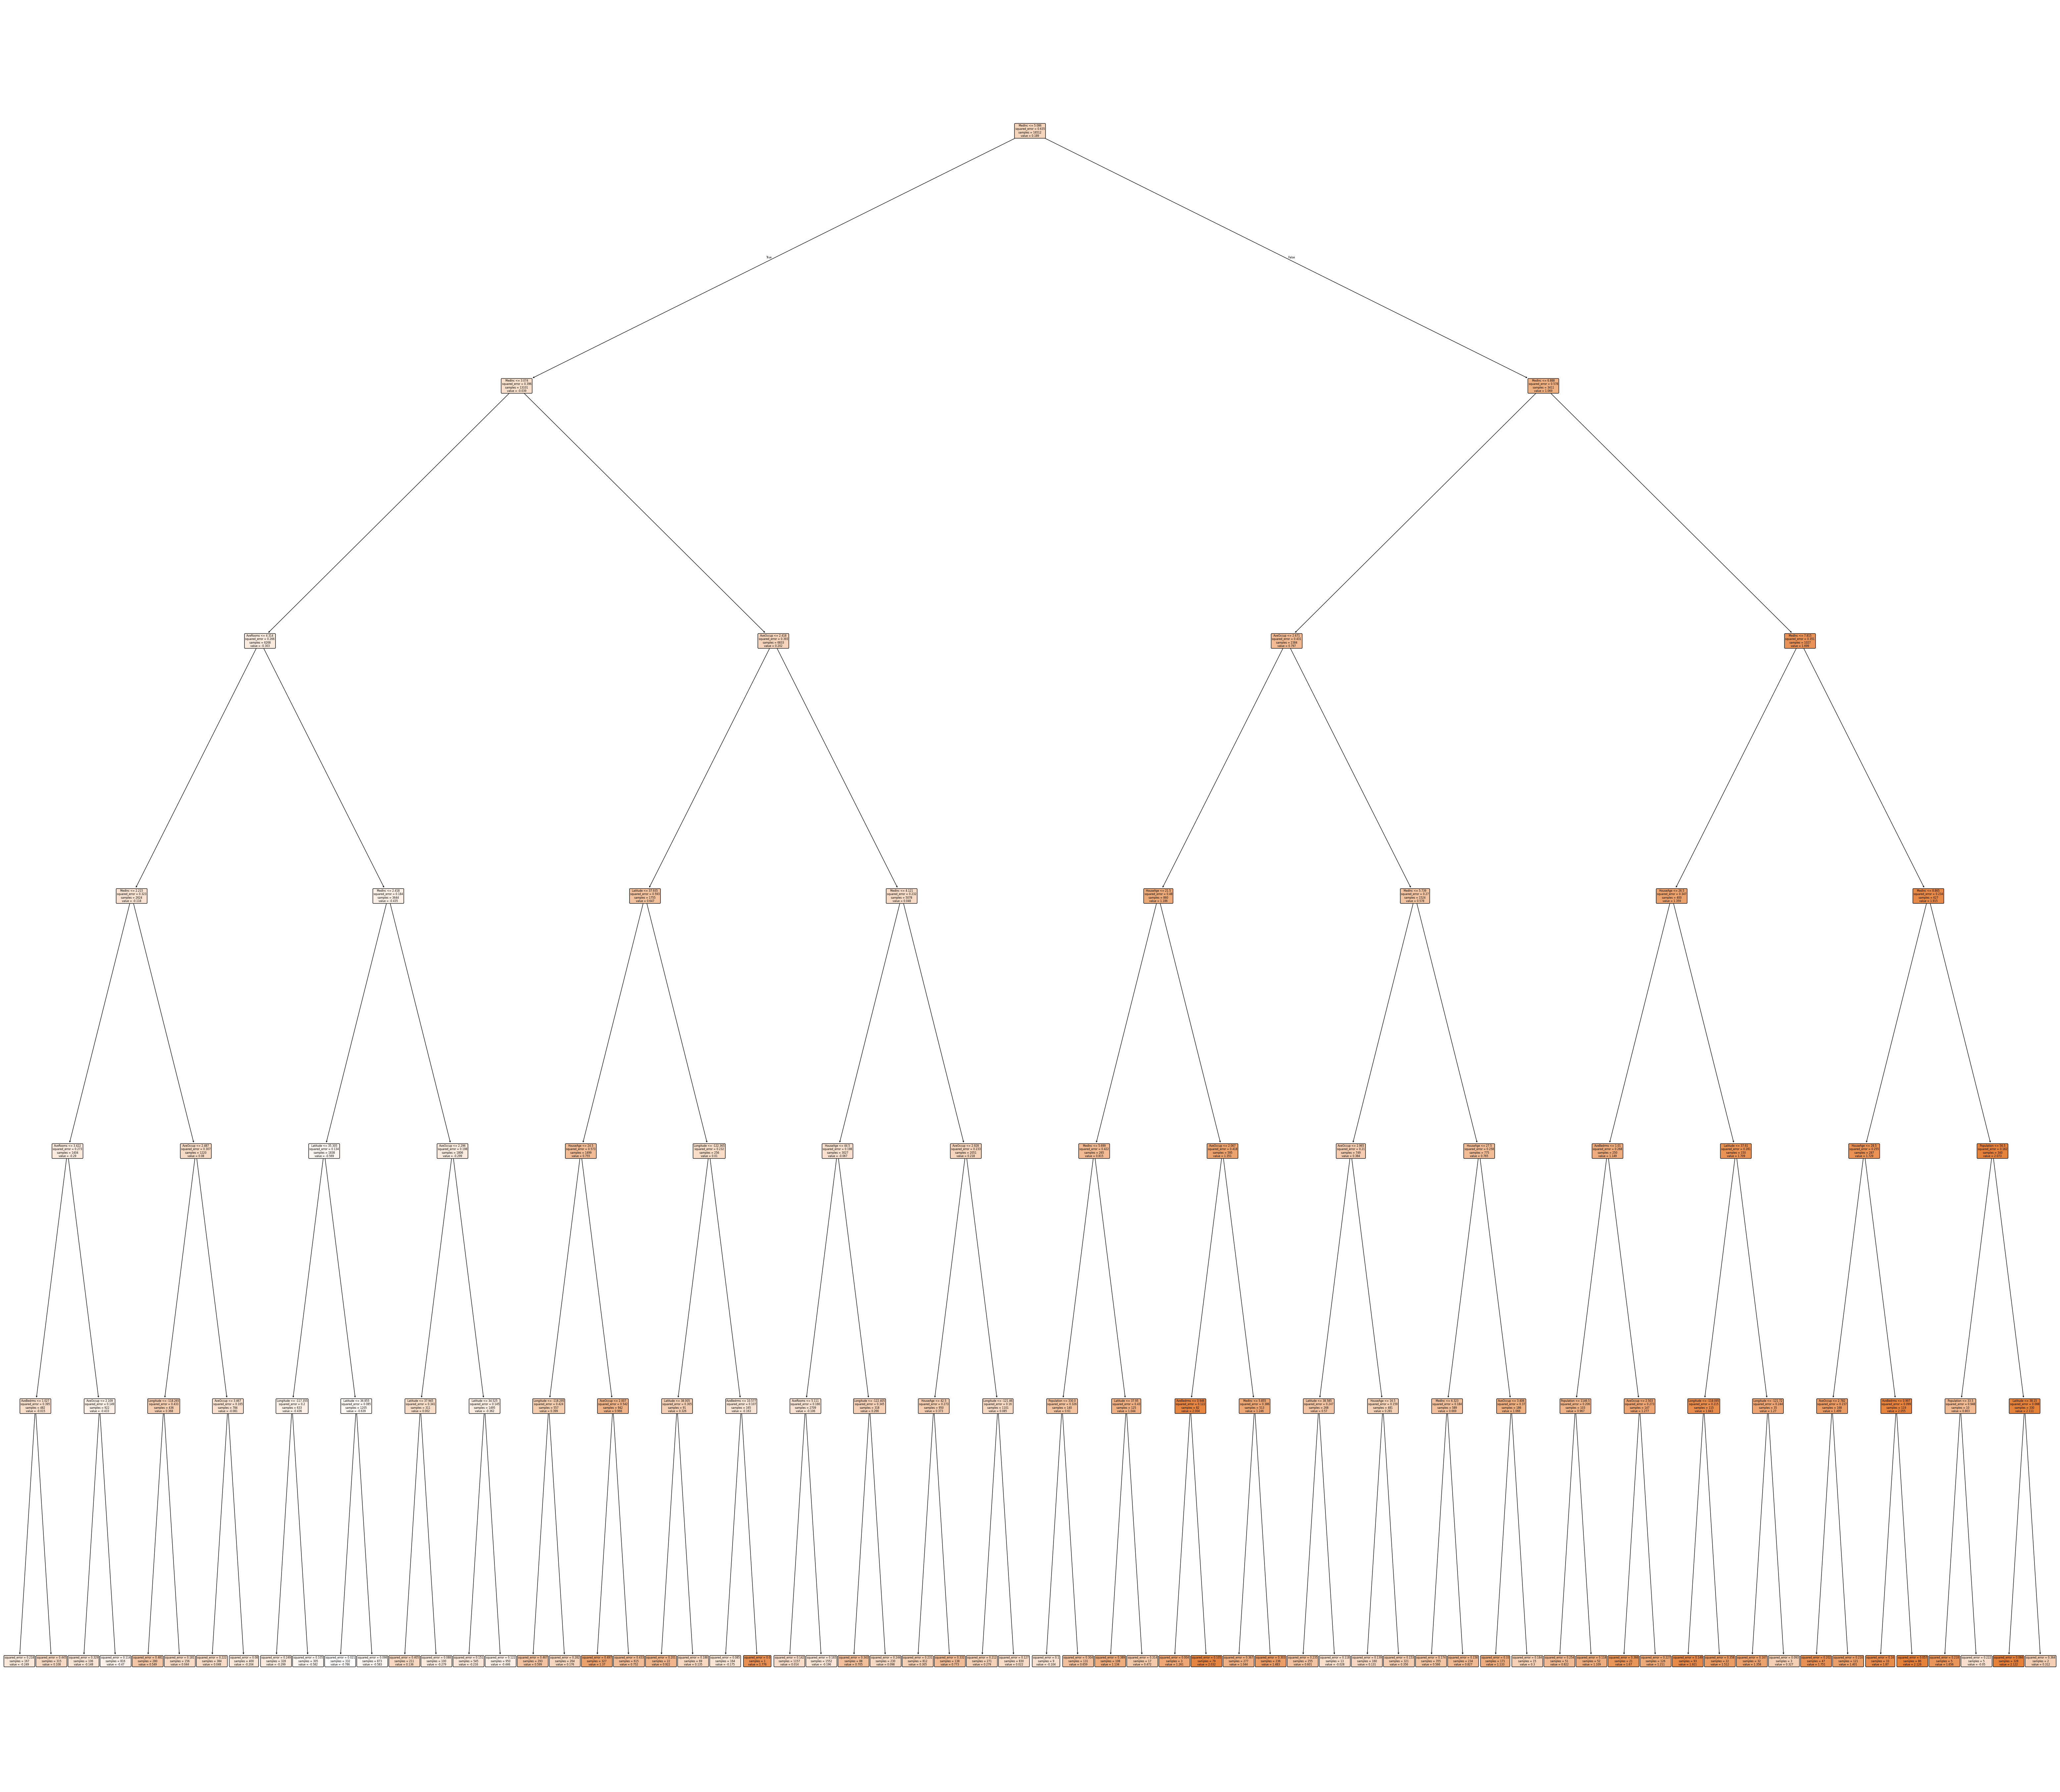

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80,70))
plot_tree(clf, feature_names=x2.columns, filled=True, rounded=True);

3 Этап.  
Повторим процедуру, но поменяем параметры дерева. Немного добавлю мах длину самого дерева и установлю мах количество узлов.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

x3 = df.drop(columns='MedHouseVal')
y3 = df['MedHouseVal']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, random_state=42, test_size=0.2)

clf2 = DecisionTreeRegressor(max_depth=12, max_leaf_nodes=112, random_state=10)

clf2.fit(x3_train, y3_train)

print(f'точность на обучении:{clf2.score(x3_train, y3_train)}')
print(f'точность на тесте:{clf2.score(x3_test, y3_test)}')

точность на обучении:0.741926305901824
точность на тесте:0.690139725240215


Из того, что я заметил, дерево дает несколько большую точность на тесте в задаче регрессии, чем линейная модель. Скорее всего оно менее чувствительно к выбросам. Я думаю, если сделать нормализацию всех признаков и "поиграть" с параметрами, можно получить подходящую точность. Лично по мне деревья хорошо использовать там, где между признаками почти нет корреляции. Очень может быть, что деревья хороши в задачах небинарной классификации, потому что в регрессии много значений признаков, дерево получается очень большим, его трудно анализировать.